# Live session

## 1. Import basic libraries

In [2]:
# imports, feel free to ignore this for now:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## 2. Loading data

Great, we're ready to get to work! Let's start by loading our dataset, in our case some mushrooms!

We will do it using Pandas, using [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

![title](https://pics.me.me/all-mushrooms-are-edible-some-orthemjusttheonce-imgflip-com-mushroom-imgflip-53720172.png)

In [3]:
# load the csv that is at path data/mushrooms.csv, into a Pandas DataFrame called data
data = pd.read_csv('data/mushrooms.csv')

## 3. Understanding data

In [3]:
data.head(5)

gill-color gill-size spore-print-color stalk-surface-above-ring  \
0          k         n                 k                        s   
1          k         b                 n                        s   
2          n         b                 n                        s   
3          n         n                 k                        s   
4          k         b                 n                        s   

   is_poisonous  height  
0             1     4.6  
1             0     4.8  
2             0     5.6  
3             1     4.8  
4             0     4.5

In [4]:
data.shape

(8124, 6)

In [5]:
# What are the columns?
data.columns

Index(['gill-color', 'gill-size', 'spore-print-color',
       'stalk-surface-above-ring', 'is_poisonous', 'height'],
      dtype='object')

In [6]:
# Which types do we have?
data.dtypes

gill-color                   object
gill-size                    object
spore-print-color            object
stalk-surface-above-ring     object
is_poisonous                  int64
height                      float64
dtype: object

In [7]:
# How many poisonous and non poisonous mushrooms do we have? 
data['is_poisonous'].value_counts()

0    4208
1    3916
Name: is_poisonous, dtype: int64

In [8]:
# How many of each gill color do we have? 
data['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In cases where we have too many unique values, using [a histogram](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html) is generally better: 

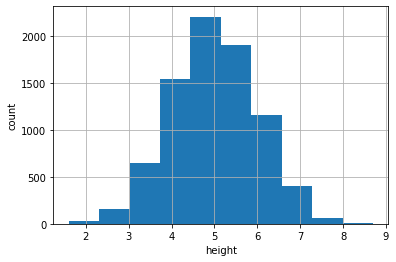

In [9]:
# draw a histogram for the height column
data['height'].hist()
# the following is Matplotlib styling code
plt.xlabel('height')
plt.ylabel('count')
plt.show()

For a continuous variable, we can get a bunch of descriptive statistics: 

In [10]:
# Mean mushroom height: 
data['height'].describe()

count    8124.000000
mean        4.996898
std         0.992183
min         1.600000
25%         4.300000
50%         5.000000
75%         5.700000
max         8.700000
Name: height, dtype: float64

Ok, now for something a bit trickier. 

We want to know what is the percentage of mushrooms that are poison, for each "color of spore-print" (whatever a spore-print is). 

In [11]:
# mean poison by color = grouping by sprint color, take the mean of each group's is_poison
mean_poison_by_color = data.groupby('spore-print-color')['is_poisonous'].mean()

mean_poison_by_color

spore-print-color
b    0.000000
h    0.970588
k    0.119658
n    0.113821
o    0.000000
r    1.000000
u    0.000000
w    0.758794
y    0.000000
Name: is_poisonous, dtype: float64

As often happens, it is easier to just plot this, by adding a `.plot` at the end.

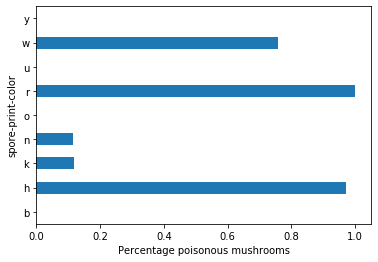

In [12]:
# plot the mean_poison_by_color, with a horizontal bar plot
mean_poison_by_color.plot(kind='barh')
# matplotlib styling (axis labels)
plt.xlabel('Percentage poisonous mushrooms')
plt.show()

## 4. Data cleaning / preparation

### 4.1. Drop columns

Assuming we realized that `stalk-surface-above-ring` doesn't have impact on `is_poisonous`, we want to drop it

In [13]:
data.head()

gill-color gill-size spore-print-color stalk-surface-above-ring  \
0          k         n                 k                        s   
1          k         b                 n                        s   
2          n         b                 n                        s   
3          n         n                 k                        s   
4          k         b                 n                        s   

   is_poisonous  height  
0             1     4.6  
1             0     4.8  
2             0     5.6  
3             1     4.8  
4             0     4.5

In [14]:
data.drop(columns=['stalk-surface-above-ring'], inplace=True)

In [15]:
data.head()

gill-color gill-size spore-print-color  is_poisonous  height
0          k         n                 k             1     4.6
1          k         b                 n             0     4.8
2          n         b                 n             0     5.6
3          n         n                 k             1     4.8
4          k         b                 n             0     4.5

Feature `stalk-surface-above-ring` dropped, goood!

### 4.2. Filling nulls

Nulls doesn't contribute to learning. So we need to fill all the NaN's in our datasets, if they are not a big portion of the feature. In that case, for simplicity, you can drop that feature.

Assume we have few nulls on `height` feature, what should we do? Without digging too much, we can simply fill it with the median of the feature.

In [16]:
data['height'] = data['height'].fillna(int(data['height'].median()))

And if we have few nulls on `spore-print-color`, what should we do? Maybe replace it with the mode of the feature.

In [17]:
data['spore-print-color'] = data['spore-print-color'].fillna(data['spore-print-color'].mode())

Very interesting, we can tell that if the color is `r` (presumably red) the mushroom is always poisonous, but if is `y` (probably yellow) it is never poisonous. 

### 4.3. Dummifying

As you might notice, our dataset has multiple types. We have features that are **categorical**, such as `gill-color`, a **continuous variable** (`height`), and a **discrete variable** (`is_poisonous`).

In [18]:
# just calling head so we can see the data again 
data.head()

gill-color gill-size spore-print-color  is_poisonous  height
0          k         n                 k             1     4.6
1          k         b                 n             0     4.8
2          n         b                 n             0     5.6
3          n         n                 k             1     4.8
4          k         b                 n             0     4.5

For some applications, such as making predictions, we need all the data to be numerical. 

For that we have an excellent tool called [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html), that will transform (make 0 or 1) our categorical data into columns. 

Let's try this with the following features `is_poisonous`,`spore-print-color`,`height`:

In [19]:
example = data[['is_poisonous','spore-print-color','height']]

In [20]:
example.head()

is_poisonous spore-print-color  height
0             1                 k     4.6
1             0                 n     4.8
2             0                 n     5.6
3             1                 k     4.8
4             0                 n     4.5

In [21]:
example_dummyfied = pd.get_dummies(example)

In [22]:
example_dummyfied.head()

is_poisonous  height  spore-print-color_b  spore-print-color_h  \
0             1     4.6                    0                    0   
1             0     4.8                    0                    0   
2             0     5.6                    0                    0   
3             1     4.8                    0                    0   
4             0     4.5                    0                    0   

   spore-print-color_k  spore-print-color_n  spore-print-color_o  \
0                    1                    0                    0   
1                    0                    1                    0   
2                    0                    1                    0   
3                    1                    0                    0   
4                    0                    1                    0   

   spore-print-color_r  spore-print-color_u  spore-print-color_w  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   spore-print-color_y  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

We can check that `spore-print-color` is dummified but nothing happened to `height` and `is_poisonous`, as they are not categorical features. Niiice!

Then let's apply this to our mushroom dataset:

In [23]:
data = pd.get_dummies(data)

In [24]:
data.head()

is_poisonous  height  gill-color_b  gill-color_e  gill-color_g  \
0             1     4.6             0             0             0   
1             0     4.8             0             0             0   
2             0     5.6             0             0             0   
3             1     4.8             0             0             0   
4             0     4.5             0             0             0   

   gill-color_h  gill-color_k  gill-color_n  gill-color_o  gill-color_p  ...  \
0             0             1             0             0             0  ...   
1             0             1             0             0             0  ...   
2             0             0             1             0             0  ...   
3             0             0             1             0             0  ...   
4             0             1             0             0             0  ...   

   gill-size_n  spore-print-color_b  spore-print-color_h  spore-print-color_k  \
0            1                    0                    0                    1   
1            0                    0                    0                    0   
2            0                    0                    0                    0   
3            1                    0                    0                    1   
4            0                    0                    0                    0   

   spore-print-color_n  spore-print-color_o  spore-print-color_r  \
0                    0                    0                    0   
1                    1                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   spore-print-color_u  spore-print-color_w  spore-print-color_y  
0                    0                    0                    0  
1                    0                    0                    0  
2                    0                    0                    0  
3                    0                    0                    0  
4                    0                    0                    0  

[5 rows x 25 columns]

In [25]:
print('We now have %0.0f rows and %0.0f columns'  % (data.shape[0], data.shape[1]))

We now have 8124 rows and 25 columns


Before we had 6 columns, remember?

### 4.4. Grouping data cleaning / preparation steps

As we need to apply the transformation to our training and test dataset we need to group those steps in a function.

Remember we:
* dropped a column;
* filled nulls in two features; and
* dummified our features.

In [26]:
def treat_data(df):
    
    df.drop(columns=['stalk-surface-above-ring'], inplace=True)
    
    df['height'] = df['height'].fillna(int(df['height'].median()))
    
    df['spore-print-color'] = df['spore-print-color'].fillna(df['spore-print-color'].mode())
    
    df = pd.get_dummies(df)
    
    return df

How can we apply that function to our dataframe?

In [27]:
# importing our virgin dataframe:
data_raw = pd.read_csv('data/mushrooms.csv')

In [28]:
final_data = treat_data(data_raw)

## 5. Train_test_split

Moving on, let's do the train_test_split:

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
target = 'is_poisonous'

features = list(final_data.columns)
features.remove(target)

X_train, X_test, y_train, y_test = train_test_split(final_data[features], 
                                                    final_data[target], 
                                                    test_size=0.33, 
                                                    random_state=42)

What is the size of our new datasets? 

In [31]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (5443, 24)
y_train shape: (5443,)
X_test shape: (2681, 24)
y_test shape: (2681,)


## 6. Train and evaluate models

In [32]:
# Importing Logistic Regression model from Sklearn library
from sklearn.linear_model import LogisticRegression

# importing accuracy score to evaluate our models - this is metric used for today
from sklearn.metrics import accuracy_score

In [33]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
predictions = log_model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print('Accuracy for %s was %0.4f' % ('Logistic Regression', accuracy))

Accuracy for Logistic Regression was 0.9608


Obviously we can and should try to tune the models parameters (check on sklearn library documentation), but we'll do that in the challenge. You might have noticed that mushrooms are relatively easy to predict.

For the challenge, remember that to make predictions you need to apply the model you trained to the test dataset. So you need to:
1. Import the test dataset to a dataframe
2. Apply the transformations you made on the training dataset to the test dataset
3. Make predictions on the test dataset

Finally, you need to create your submission file to upload it to the platform :D

## It's time to move on! Let's try to predict the Titanic survivals!!!

*Spoiler alert: Jack still dies!*

![title](https://media.giphy.com/media/HIYW8sTRTHt1m/giphy.gif)